In [110]:
CLEANED_DATASET_PATH = '../dataset/egypt_real_estate_listings_cleaned.csv' 
TREE_MAP_FIG_PATH = '../reports/tree_map_fig.html'

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [87]:
df = pd.read_csv(CLEANED_DATASET_PATH)
df.head()

,price,type,available_from,payment_method,governorate,city,district,compound,size_sqm,bedrooms_num,has_maid_room,bathrooms_num
0,12200000.0,Apartment,2023-06-14,Cash,North Coast,Al Alamein,New Alamein City,North Edge Towers,114.0,2,False,1
1,7000000.0,Apartment,2023-07-18,Cash,Cairo,Heliopolis - Masr El Gedida,Almazah,Almazah,135.0,3,False,2
2,12000000.0,Twin House,2023-08-03,Cash,Cairo,New Cairo City,The 5Th Settlement,Layan Residence,266.0,3,True,4
3,11000000.0,Apartment,2023-09-20,Cash,Cairo,New Cairo City,El Katameya,District 5 Residences,154.0,2,False,3
4,18500000.0,iVilla,2023-12-24,Cash,Cairo,New Cairo City,The 5Th Settlement,Mountain View Hyde Park,305.0,3,True,3


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18549 entries, 0 to 18548
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           18549 non-null  float64
 1   type            18549 non-null  object 
 2   available_from  18549 non-null  object 
 3   payment_method  18549 non-null  object 
 4   governorate     18549 non-null  object 
 5   city            18549 non-null  object 
 6   district        18549 non-null  object 
 7   compound        18549 non-null  object 
 8   size_sqm        18549 non-null  float64
 9   bedrooms_num    18549 non-null  int64  
 10  has_maid_room   18549 non-null  bool   
 11  bathrooms_num   18549 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 1.6+ MB


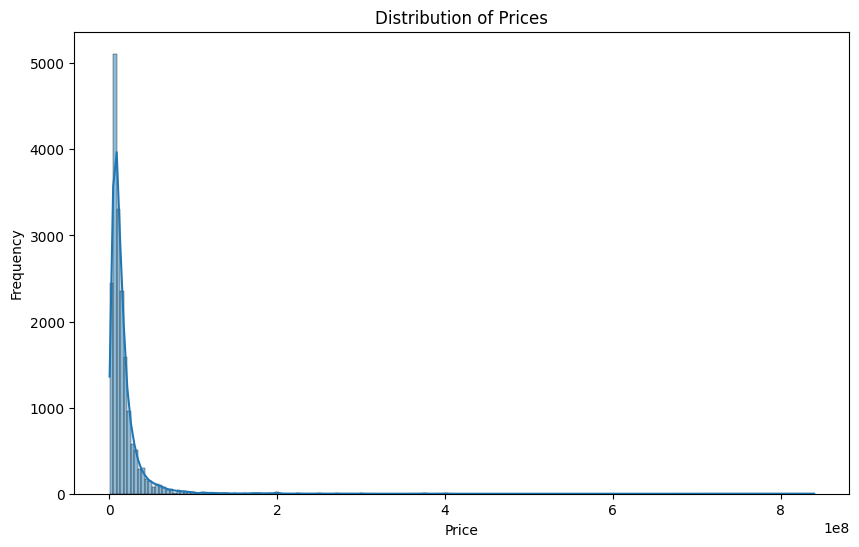

In [89]:
#distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=200, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [90]:
df["governorate"].value_counts()

governorate
Cairo             7138
North Coast       4929
Giza              3983
Red Sea           1515
Suez               506
Alexandria         367
Qalyubia            57
South Sainai        28
Al Daqahlya          8
Matrouh              6
Sharqia              4
Demyat               3
Asyut                2
Kafr El Sheikh       1
Luxor                1
Aswan                1
Name: count, dtype: int64

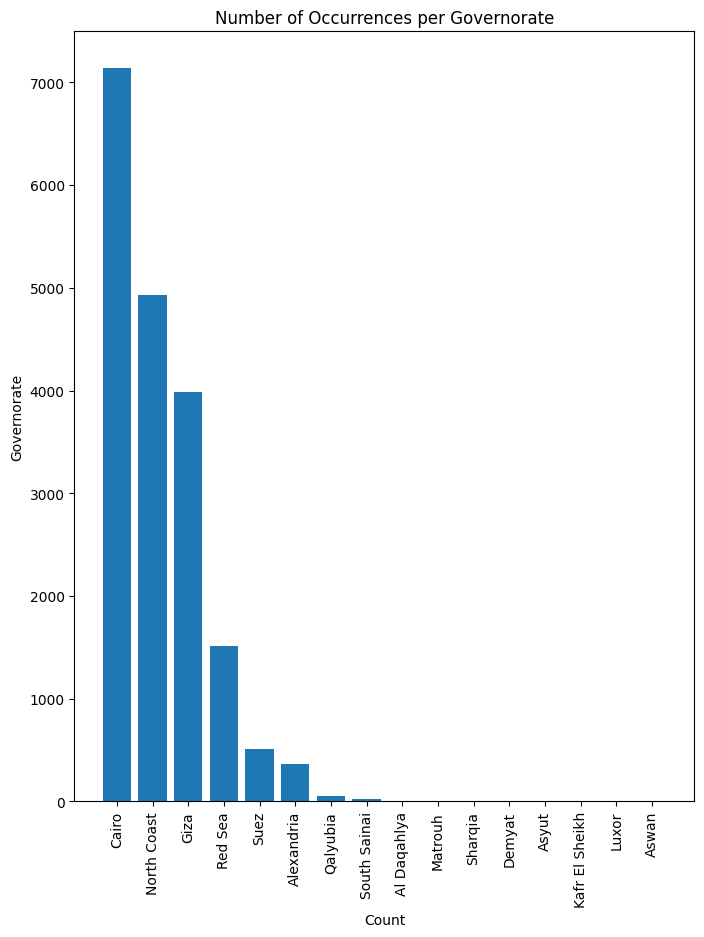

In [91]:
plt.figure(figsize=(8, 10))
governorate_counts = df["governorate"].value_counts()

plt.bar(governorate_counts.index, governorate_counts.values)  # horizontal bar chart
plt.xlabel("Count")
plt.ylabel("Governorate")
plt.xticks(rotation=90)
plt.title("Number of Occurrences per Governorate")
plt.show()


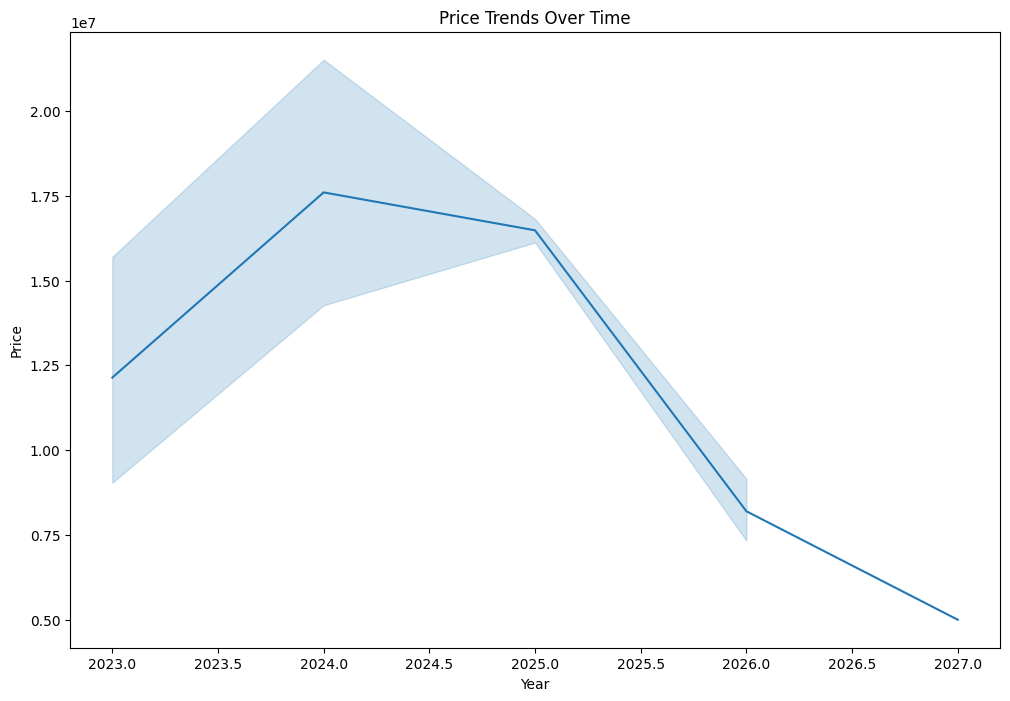

In [92]:
# prices overtime
df["available_from"] = pd.to_datetime(df["available_from"])
df["year"] = df["available_from"].dt.year
df["month"] = df["available_from"].dt.month
df["day"] = df["available_from"].dt.day

plt.figure(figsize=(12, 8))
sns.lineplot(x="year", y="price", data=df)
plt.title("Price Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()


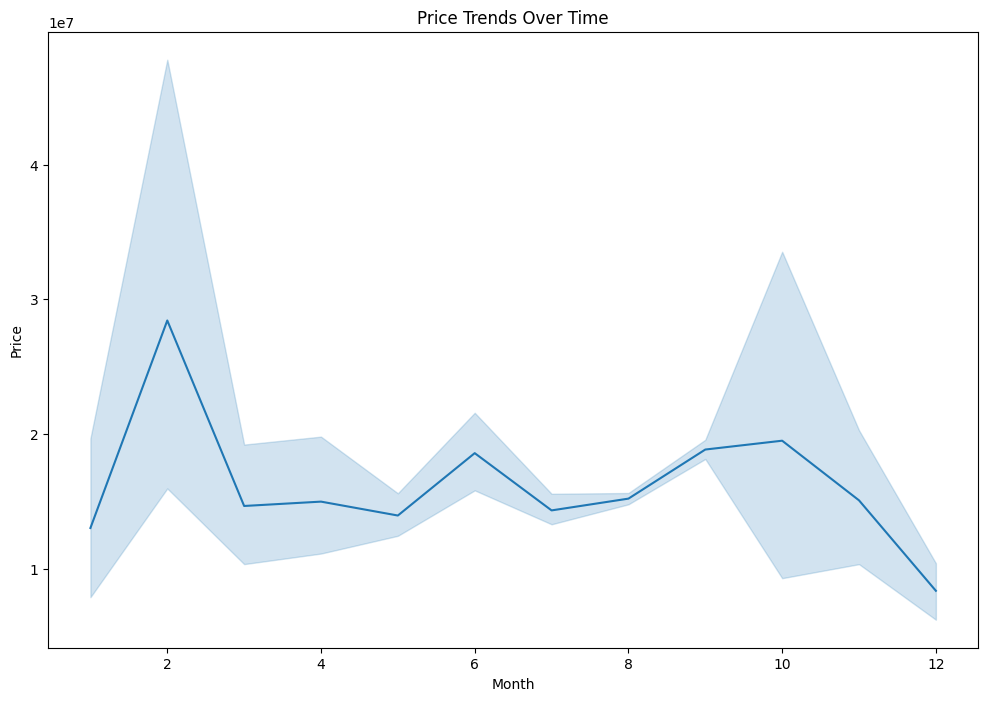

In [93]:
plt.figure(figsize=(12, 8))
sns.lineplot(x="month", y="price", data=df)
plt.title("Price Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

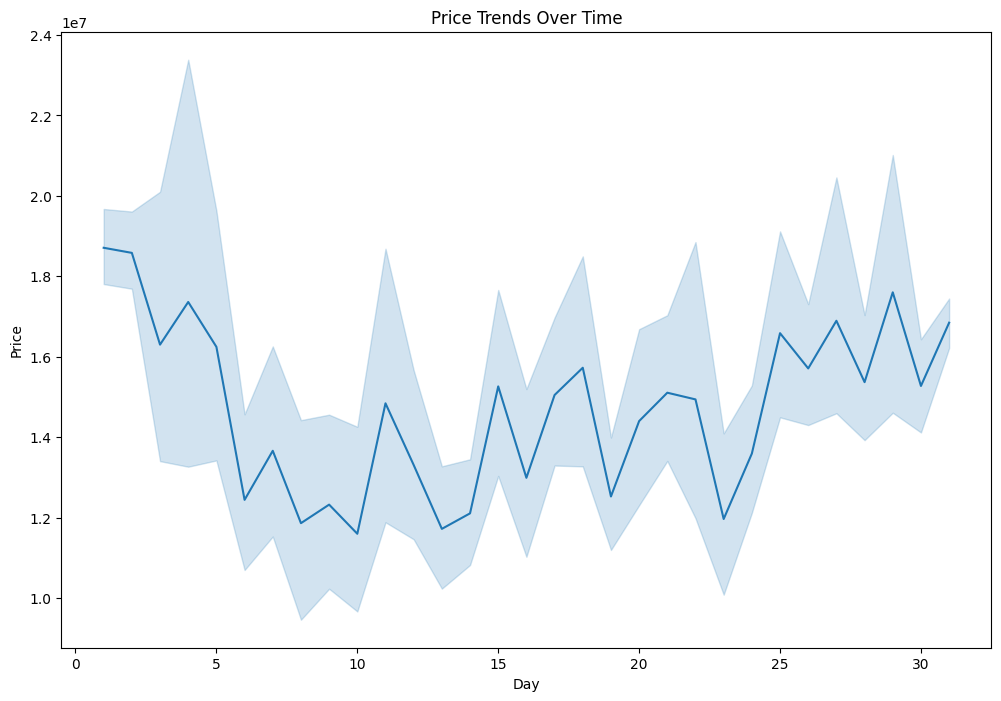

In [94]:
plt.figure(figsize=(12, 8))
sns.lineplot(x="day", y="price", data=df)
plt.title("Price Trends Over Time")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

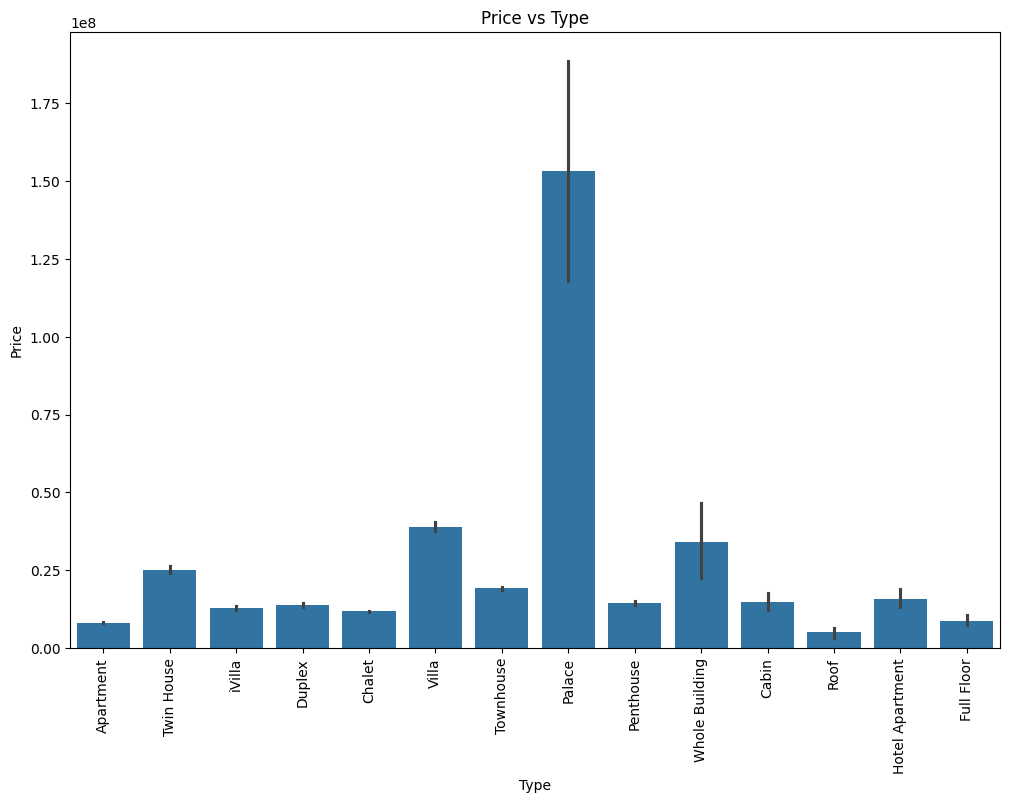

In [95]:
plt.figure(figsize=(12, 8))
sns.barplot(x="type", y="price", data=df)
plt.title("Price vs Type")
plt.xlabel("Type")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()


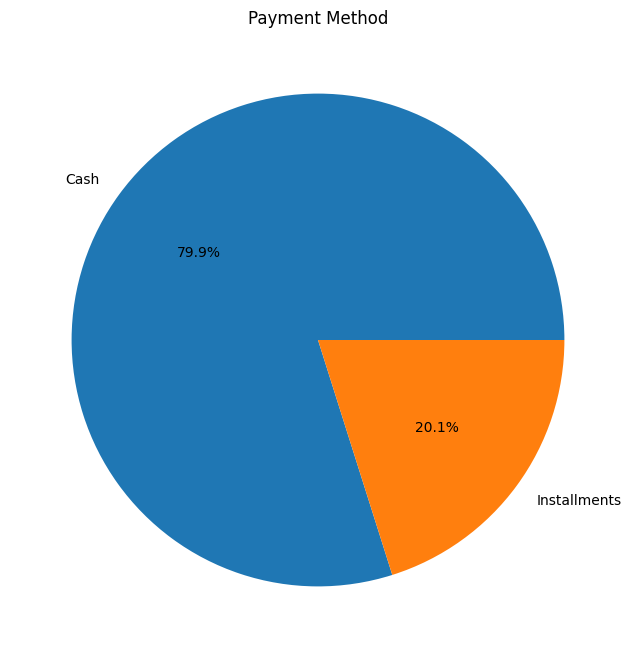

In [96]:
plt.figure(figsize=(12, 8))
plt.pie(df["payment_method"].value_counts(), labels=df["payment_method"].value_counts().index, autopct='%1.1f%%')
plt.title("Payment Method")
plt.show()

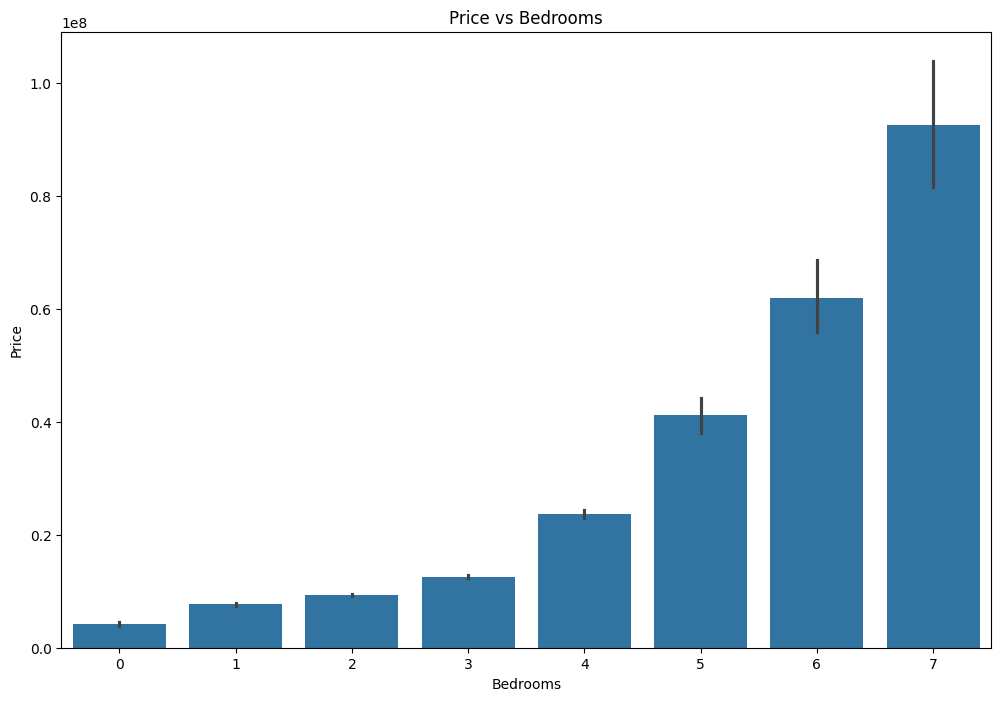

In [97]:
plt.figure(figsize=(12, 8))
sns.barplot(x="bedrooms_num", y="price", data=df)
plt.title("Price vs Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

In [98]:
gover_num_rooms = df.groupby(["governorate", "bedrooms_num"])["price"].mean().reset_index()
gover_num_rooms.sort_values(by=["governorate", "price"], ascending=False, inplace=True)
gover_num_rooms

,governorate,bedrooms_num,price
68,Suez,6,2.245833e+07
67,Suez,5,1.445836e+07
66,Suez,4,1.396775e+07
69,Suez,7,1.300000e+07
65,Suez,3,9.301383e+06
...,...,...,...
3,Alexandria,1,6.800000e+06
4,Alexandria,2,5.340256e+06
2,Al Daqahlya,5,7.130000e+06
0,Al Daqahlya,2,3.387500e+06


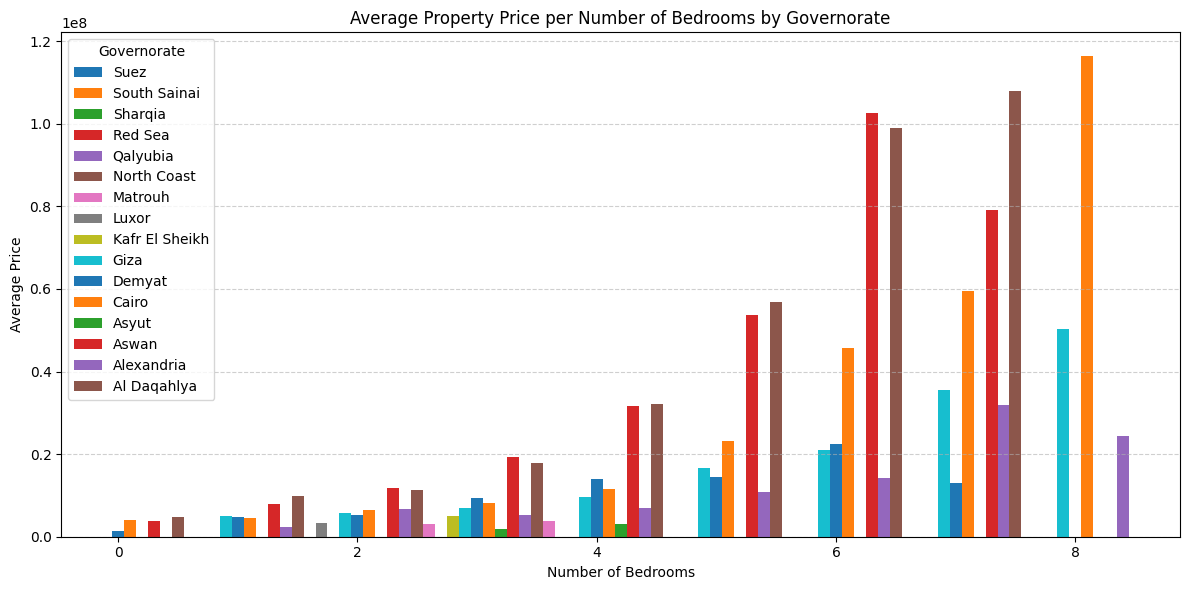

In [99]:
plt.figure(figsize=(12, 6))

for governorate in gover_num_rooms["governorate"].unique():
    subset = gover_num_rooms[gover_num_rooms["governorate"] == governorate]
    plt.bar(
        subset["bedrooms_num"] + 0.1 * list(gover_num_rooms["governorate"].unique()).index(governorate), 
        subset["price"], 
        width=0.1, 
        label=governorate
    )

plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.title("Average Property Price per Number of Bedrooms by Governorate")
plt.legend(title="Governorate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [114]:
location_price = df.groupby(["governorate", "city","district","compound","type","bedrooms_num","bathrooms_num"])["price"].mean().reset_index()
location_price

,governorate,city,district,compound,type,bedrooms_num,bathrooms_num,price
0,Al Daqahlya,Al Mansoura,0 Hurghada\n1 ...,Al Mansoura,Apartment,2,1,1.800000e+06
1,Al Daqahlya,Al Mansoura,0 Hurghada\n1 ...,Al Mansoura,Apartment,3,2,1.000000e+06
2,Al Daqahlya,Al Mansoura,Gadeela Area,Gadeela Area,Apartment,3,2,2.430833e+06
3,Al Daqahlya,Al Mansoura,Matafi St.,Matafi St.,Apartment,3,3,2.650000e+06
4,Al Daqahlya,New Mansoura,The Pearl New Mansoura,The Pearl New Mansoura,Apartment,2,3,4.975000e+06
...,...,...,...,...,...,...,...,...
6612,Suez,Al Ain Al Sokhna,Telal Al Sokhna,Telal Al Sokhna,Villa,5,6,2.300000e+07
6613,Suez,Al Ain Al Sokhna,Telal Al Sokhna,Telal Al Sokhna,Villa,6,5,2.350000e+07
6614,Suez,Al Ain Al Sokhna,Telal Al Sokhna,Telal Al Sokhna,Villa,6,6,2.175000e+07
6615,Suez,Al Ain Al Sokhna,The Groove,The Groove,Chalet,2,1,7.500000e+06


In [ ]:
fig = px.treemap(
    location_price,
    path=['governorate', 'city', 'district', 'compound','type'],
    values='price',
    color='price',
    hover_data=['price'],
    color_continuous_scale='Blues'
)

fig.update_layout(
    title="Real Estate Price Distribution by Governorate, City, District, and Compound",
    title_x=0.5
)

fig.write_html(TREE_MAP_FIG_PATH)
fig.show(renderer="browser")